Aluno: Davi Grumiche Seemann

# Introdução
Nesta atividade foram plotadas as PDF's das distribuições Rayleigh, Rician e Nakagami, e também foram plotadas as distribuições de potência estantânea recebida. Para isso, foi utilizado python com as bibliotecas numpy, matplotlib e scipy.

# PDF das distribuições

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, i0

# from scipy.stats import rayleigh, rice, nakagami


def rayleigh_pdf(h):
    Ph = 1
    return 2 * h * np.exp(-(h**2) / Ph) / Ph


def rician_pdf(h, K):
    return (
        2
        * h
        * (K + 1)
        * i0(2 * h * np.sqrt(K * (K + 1)))
        * np.exp(-K - (K + 1) * (h**2))
    )


def nakagami_pdf(h, m):
    return (2 * (m**m) * (h ** (2 * m - 1)) * np.exp(-m * h * h)) / gamma(m)

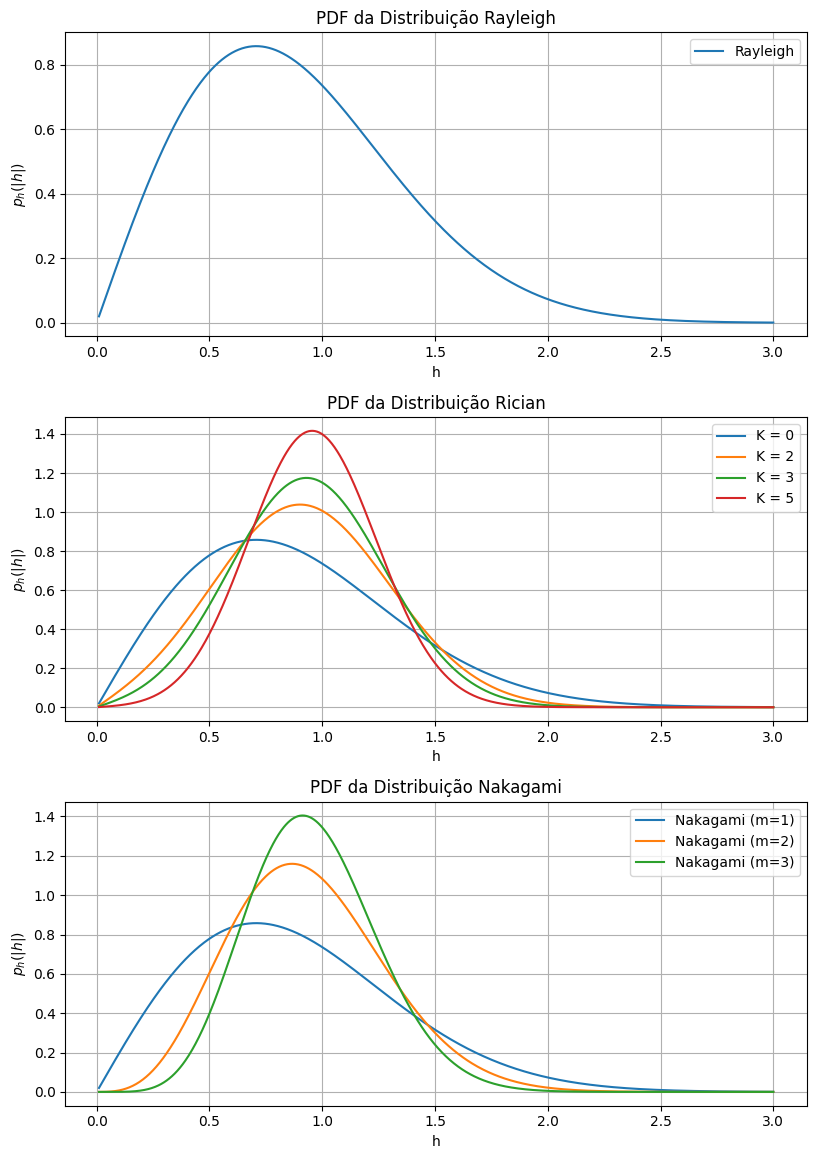

In [33]:
x = np.linspace(0.01, 3, 1000)  # Valores de h para plotar as PDFs

# Distribuição Rayleigh
rayleigh = rayleigh_pdf(x)

# Distribuição Rician
pdf_rician_0 = rician_pdf(x, 0)  # Parâmetro K em dB
pdf_rician_2 = rician_pdf(x, 2)  # Parâmetro K em dB
pdf_rician_3 = rician_pdf(x, 3)  # Parâmetro K em dB
pdf_rician_5 = rician_pdf(x, 5)  # Parâmetro K em dB


# Distribuição Nakagami-m
nakagami_pdf_1 = nakagami_pdf(x, 1)
nakagami_pdf_2 = nakagami_pdf(x, 2)
nakagami_pdf_3 = nakagami_pdf(x, 3)


# Plotando as PDFs das distribuições de amplitude em gráficos separados


plt.figure(
    figsize=(8.27, 11.69)
)  # Tamanho de uma folha A4 em polegadas (largura x altura)


# Gráfico para Rayleigh
plt.subplot(3, 1, 1)
plt.plot(x, rayleigh, label="Rayleigh")
plt.xlabel("h")
plt.ylabel(r"$p_h(|h|)$")
plt.title("PDF da Distribuição Rayleigh")
plt.legend()


plt.grid(True)

# Gráfico para Rician
plt.subplot(3, 1, 2)
plt.plot(x, pdf_rician_0, label="K = 0")
plt.plot(x, pdf_rician_2, label="K = 2")
plt.plot(x, pdf_rician_3, label="K = 3")
plt.plot(x, pdf_rician_5, label="K = 5")
plt.xlabel("h")
plt.ylabel(r"$p_h(|h|)$")
plt.title("PDF da Distribuição Rician")
plt.legend()
plt.grid(True)

# Gráfico para Nakagami-m
plt.subplot(3, 1, 3)
plt.plot(x, nakagami_pdf_1, label="Nakagami (m=1)")
plt.plot(x, nakagami_pdf_2, label="Nakagami (m=2)")
plt.plot(x, nakagami_pdf_3, label="Nakagami (m=3)")
plt.xlabel("h")
plt.ylabel(r"$p_h(|h|)$")
plt.title("PDF da Distribuição Nakagami")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Uma coisa que podemos notar nos gráficos é que, à medida que aumentam os valores de $K$ na Distribuição Rician e de $m$ na Distribuição Nakagami, as curvas se movem para a direita e ficam mais concentradas em valores maiores de $h$. Isso quer dizer que o sinal sofre menos desvanecimento, ou seja, há uma parte do sinal direto, como se tivesse uma linha de visada mais forte.

# Distribuição de potência estantânea recebida Rayleigh, Rice e Nakagami


A potência instantânea recebida é determinada pelo quadrado da magnitude do fading. Assim, é importante conhecer a distribuição de probabilidade dessa potência recebida. Usando as mesmas PDFs mencionadas anteriormente, essas curvas foram geradas com a ajuda de um programa de computador e estão representadas abaixo.

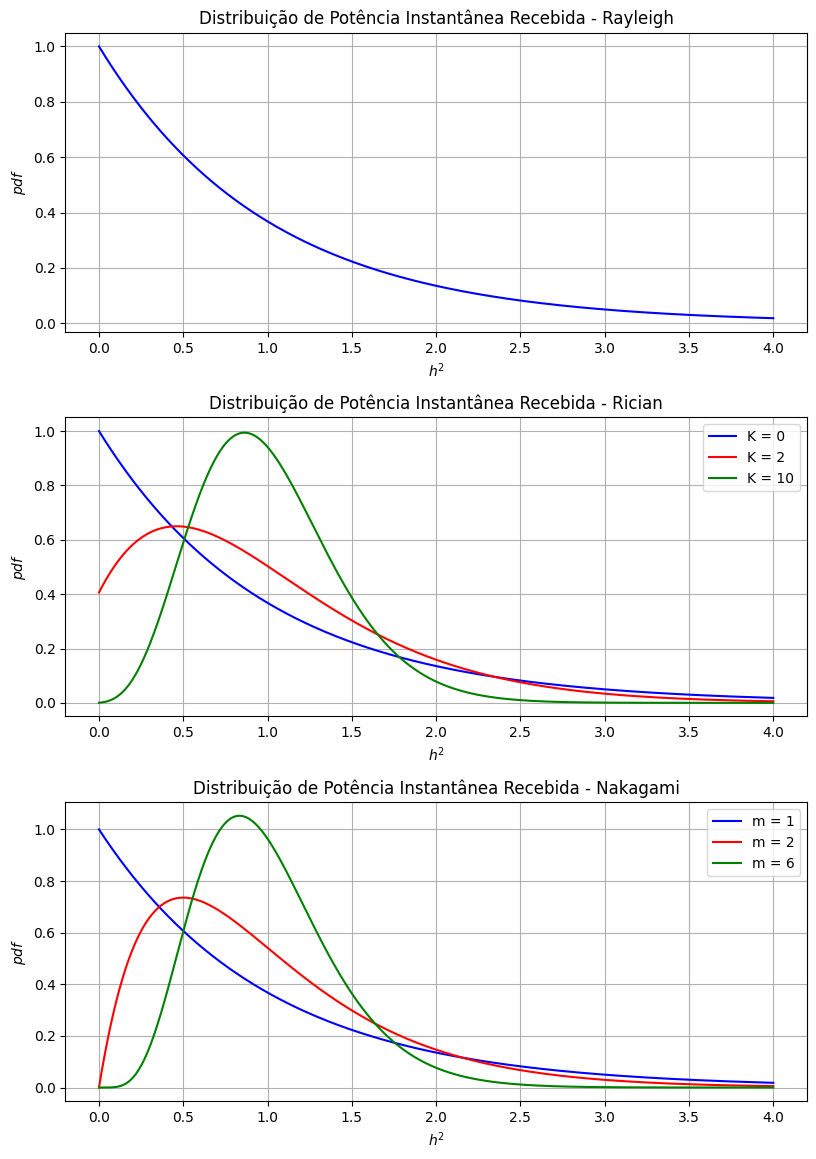

In [43]:
h = np.linspace(0.01, 2, 1000)

plt.figure(
    figsize=(8.27, 11.69)
)  # Tamanho de uma folha A4 em polegadas (largura x altura)
# Distribuição de h^2 - Rayleigh
plt.subplot(3, 1, 1)
plt.plot(h**2, rayleigh_pdf(h) * (1 / (2 * h)), color="blue")
plt.xlabel("$h^2$")
plt.ylabel(r"$pdf$")
plt.title("Distribuição de Potência Instantânea Recebida - Rayleigh")
plt.grid()

# Distribuição de h^2  - Rice
plt.subplot(3, 1, 2)
plt.plot(h**2, rician_pdf(h, 0) * (1 / (2 * h)), label="K = 0 ", color="blue")
plt.plot(h**2, rician_pdf(h, 2) * (1 / (2 * h)), label="K = 2", color="red")
plt.plot(h**2, rician_pdf(h, 10) * (1 / (2 * h)), label="K = 10", color="green")
plt.xlabel("$h^2$")
plt.ylabel(r"$pdf$")
plt.title("Distribuição de Potência Instantânea Recebida - Rician")
plt.legend()
plt.grid()

# Distribuição de h^2  - Nakagami-m
plt.subplot(3, 1, 3)
plt.plot(h**2, nakagami_pdf(h, 1) * (1 / (2 * h)), label="m = 1", color="blue")
plt.plot(h**2, nakagami_pdf(h, 2) * (1 / (2 * h)), label="m = 2", color="red")
plt.plot(h**2, nakagami_pdf(h, 6) * (1 / (2 * h)), label="m = 6", color="green")
plt.xlabel(r"$h^2$")
plt.ylabel(r"$pdf$")
plt.title("Distribuição de Potência Instantânea Recebida - Nakagami")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()